# How to use this document

## What is org-mode

This is org-mode document. Org-mode is a markup language which allows to
write text documents containing executable code blocks.

Org-mode can do much more than this and you can find out more
[here.](https://orgmode.org)

Org-mode works in emacs (the best editor in the world).

## Code blocks

You can do two things with code blocks (besides simply reading them):

1.  execute: this can be done using the `C-c C-c` (Ctrl-c Ctrl-c)
    keybinding. The stdout of the code will be appended below the code
    block itself

2.  tangle: tangling a code block means creating a separate file that
    contains the code which can thus be compiled and run as usual. If
    you hit `C-c C-v C-t` (this call the emacs function
    `org-babel-tangle`) all the code blocks in this file will be
    tangled. If, instead, you only want to tangle a single code blocks,
    go to that block and hit `C-u C-c C-v C-t`

## Compiling and running a tangled code block

Once you have tangled a code block, you can compile and run it like any
other code. For the code blocks of this document to work, you have to
use the following compile command:

``` sourceCode
gcc -fopenmp -I. aux.c code_block.c -o code_block
```

And then you can run it by launching the `code_block` executable

``` sourceCode
./code_block
```

## Some other useful tricks

-   **Set an environment variable**: in order to set an environment
    variable within emacs you have to hit `M-x setenv` then write the
    name of the variable, hit enter, write its value and hit enter again

-   **Refresh images in an org-mode document**: if images don't show up,
    use the command `M-x org-redisplay-inline-images`

-   **Show this document as a presentation**: to show this document as a
    sequence of slides, you must install the emacs `org-tree-slide`
    package. Then open the document and execute the command
    `M-x org-tree-slide-mode`. You can mode forward and backward using
    the `>` and `<` keys. The setup code at the bottom of this file
    should automagically install this package upon opening

-   **Export and org-mode document**: Org-mode lets you export org-mode
    documents in various formats such as pdf or html. Just hit `C-c C-e`
    and follow the instructions.

-   When you open this document, the code block at the bottom (in the
    Setup section) is supposed to be executed automatically to setup
    your environment. If this does not happen (it may be the case in
    older emacs version), just go there and hit `C-c C-c` to execute it
    manually. Also, the two code blocks named `auxc` and `auxh` are
    supposed to be tangled automatically. If this does not happen, do it
    manually.

# Introduction

## Parallel computer architectures

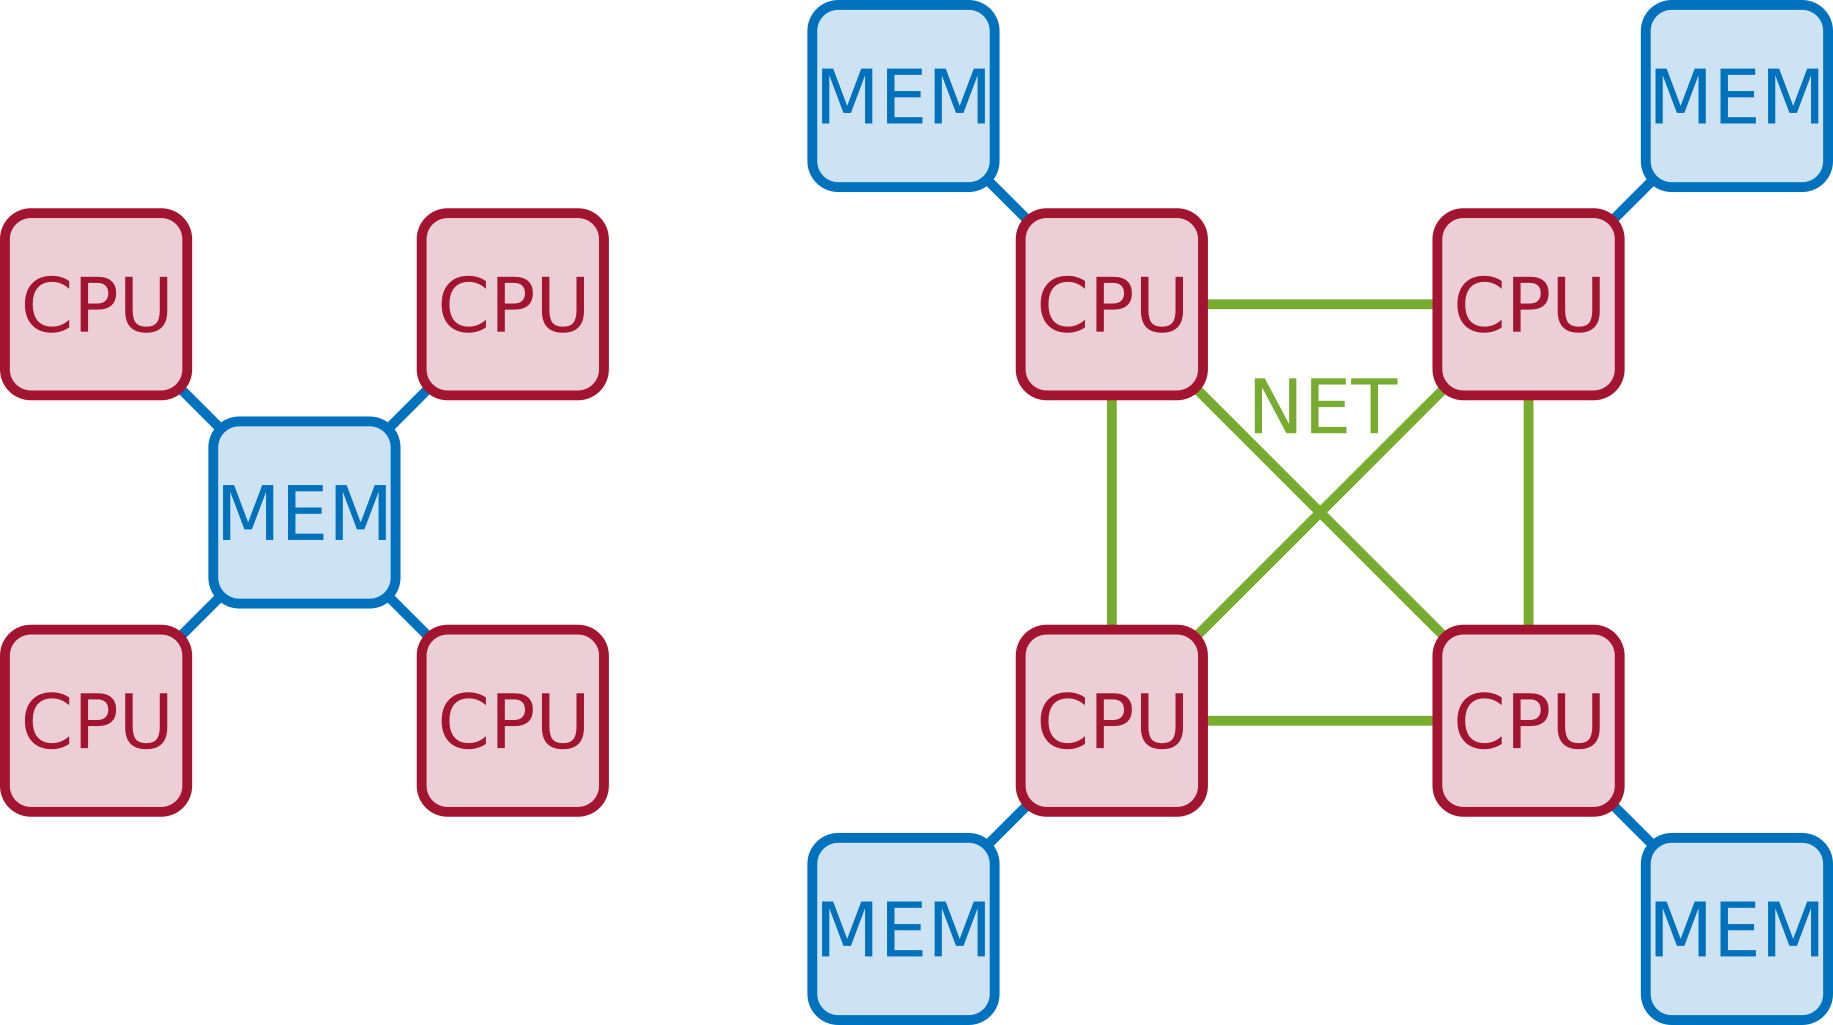

Roughly speaking, parallel computers can be classified into two types:

1.  **Shared memory**: all the CPUs share one (logical) memory, i.e.,
    all processes can access the same addressing space regardless of the
    CPU they are running on. This makes it simple to communicate data
    from one process to another

2.  **Distributed memory**: the computer is actually formed of multiple
    node, each having one or more CPUs and its own memory. Nodes are
    connected through a network. A process running on one node can only
    access data on the local memory; therefore, if it needs data that is
    on another node, a message must be exchanged through the network

## Shared memory: SMP vs NUMA

One "logical memory" does not necessarily mean that only one physical
memory exists. If multiple memory modules exist, access to data may
non-uniform

-   Symmetric Multi-Processor (SMP): all CPUs can access to all data
    with the same bandwidth and latency
-   Non-Uniform Memory Access (NUMA): all CPUs can access to all data
    but bandwidth and latency depends on where the data is placed

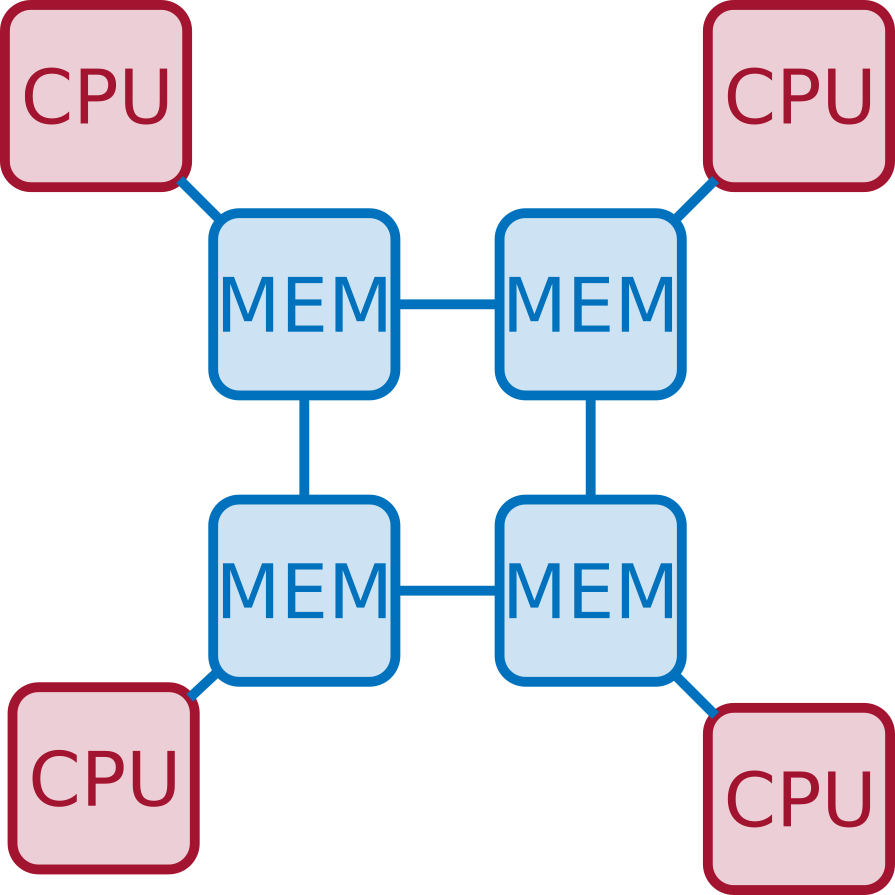

Both types of shared-memory architectures can be programmed using the
same tools and technologies. When performance is a concern, though,
special care must be taken for NUMA machines (we will not cover in this
course)

## Multicore processors: why?

Until the early 00's all processors had only one core (in fact we did
not use the word "core" at all). Then why have multicore processors
become ubiquitous? Energy consumption is the reason why:

<span class="math inline">*P* = *CV*<sup>2</sup>*f*</span>

however there is a linear dependence between
<span class="math inline">*f*</span> and
<span class="math inline">*V*</span>, therefore
<span class="math inline">*P*</span> grows as the cube of \$f\$!!!

Because the performance of single-core processors could only be improved
by increasing the frequency, this trend became unsustainable.

Multicore processors design relies on **Thread Level Parallelism** to
improve performance. This means that more transistors are used to
assemble multiple execution units (i.e., cores) on a single chip. This
improves performance with only a linear increase in the energy
consumption: the capacitance <span class="math inline">*C*</span> grows
because of the increased number of transistors.

In fact, it is also possible to produce faster processors which consume
less energy!!! Consider a quad-core processor with frequency
<span class="math inline">0.6*f*</span>: it will be 2.4 times faster and
consume roughly 15\\ less energy

## Multicore processors: why?

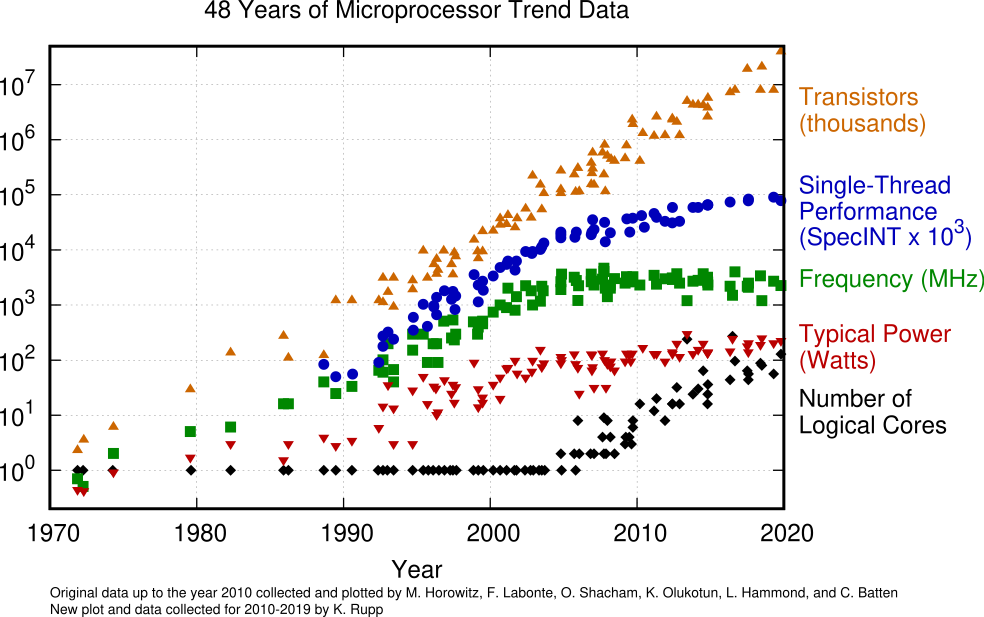

## Multicore architecture

Multicore computer: what does it look like?

The `hwloc` library is designed to retrieve all the details of the
architecture. For example, on my computer, I can run the `lstopo`
program from `hwloc` to retrieve the architecture:

``` sourceCode
ssh plafrim lstopo --of png 
```

## How to program multicore computers?

Many options exist, but they are not all simple, portable, efficient
etc.

Examples:

-   **pThreads** (POSIX Threads): difficult to use and debug, not fully
    portable

-   **Intel TBB/OneAPI**: proprietary

-   **Cilk**: limited support and portability

-   **OpenMP**: extremely portable, efficient, relatively easy to use.
    huge community and support

# The OpenMP standard

## Basic ideas and components

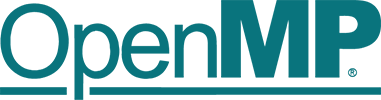

**OpenMP** (Open specifications for MultiProcessing) is an Application
Program Interface (API) to explicitly direct multi-threaded, shared
memory parallelism.

-   First standard 1.0 was published in 1997

-   Latest standard is 5.2 published in November 2021

    -   Full specs are at this
        [URL](https://www.openmp.org/wp-content/uploads/OpenMP-API-Specification-5-2.pdf)

    -   Examples and exercises are at this
        [URL](https://www.openmp.org/wp-content/uploads/openmp-examples-5.2.1.pdf)

-   Many resources at <https://www.openmp.org>

The OpenMP standard is developed by an advisory board that includes many
members from academia (UTK, LBNL, ANL, NASA,…) and industry (Intel, AMD,
NEC, Fujitsu, NVIDIA,…)

## Basic ideas and components

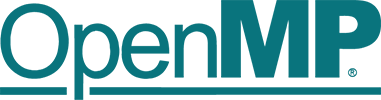

-   OpenMP is Comprised of three primary API components:
    1.  **Language directives**
    2.  **Runtime library routines**
    3.  **Environment variables**
-   Portable:
    -   Specifications for C/C++ and Fortran
    -   Already available on many systems (including Linux, Win, IBM,
        SGI etc.)

## Disclaimer

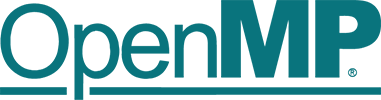

This course does not cover the whole OpenMP standard. The OpenMP manual
is over 600 pages as of today (v5.2)

Only a subset of constructs and clauses will be presented.

Tons of tutorials can be found online but better be used with
moderation.

## Fork-join execution model

OpenMP is based on a fork-join execution model:

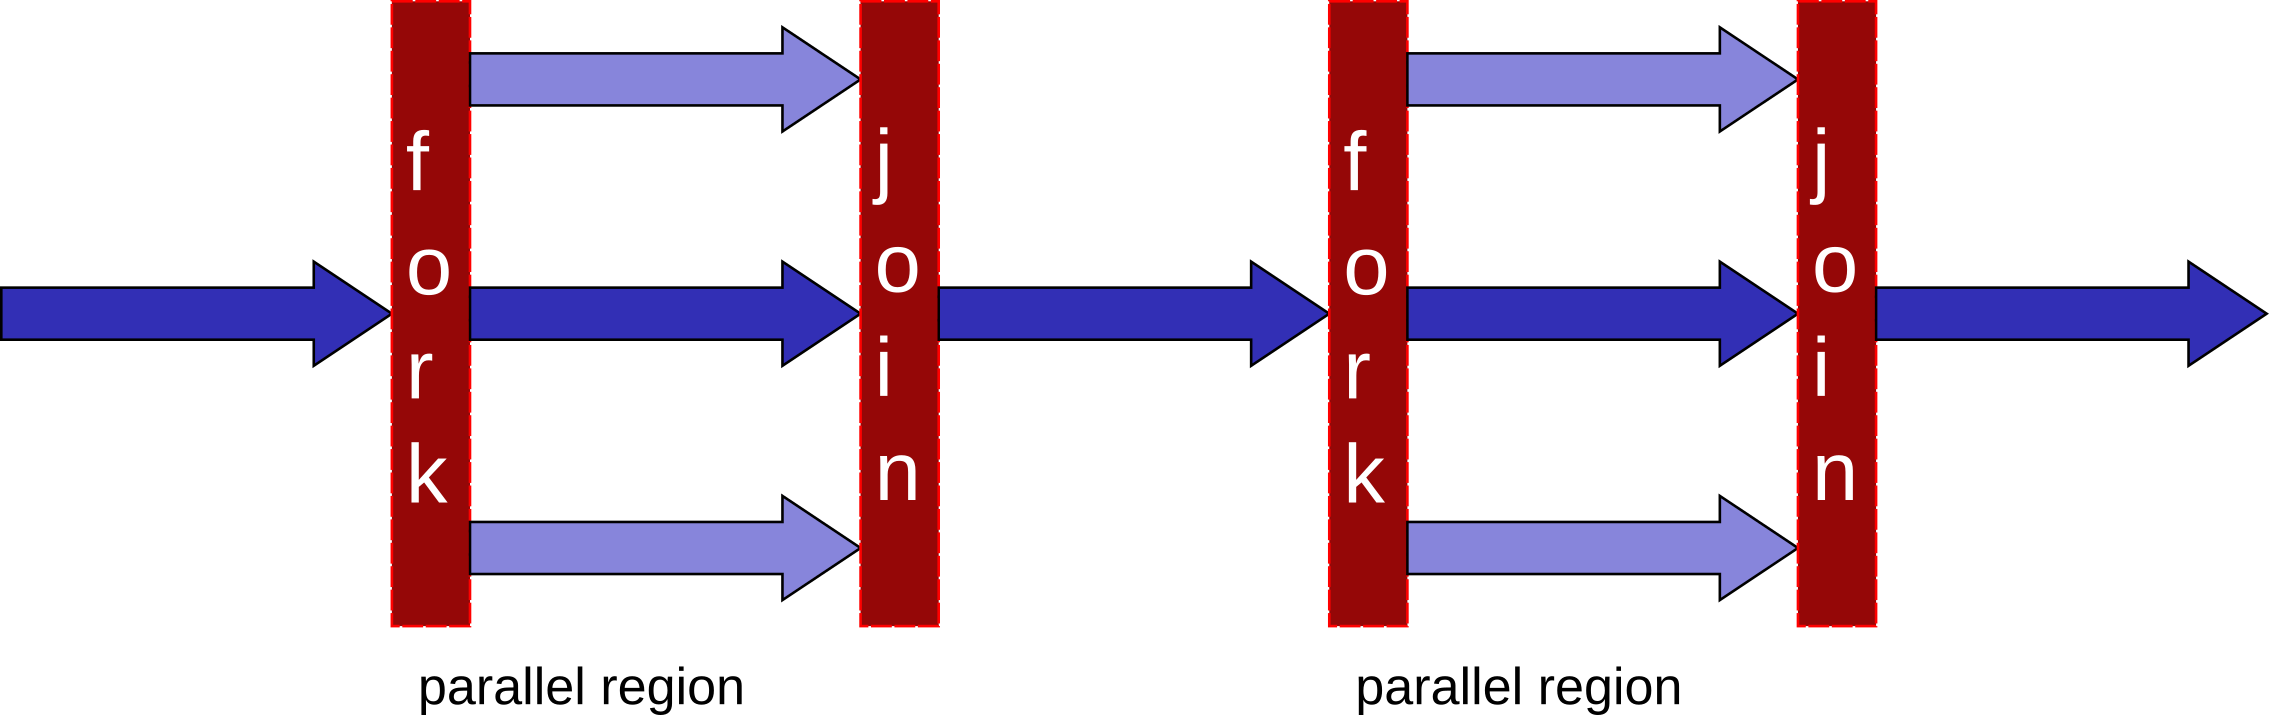

-   Execution is started by a single thread called master thread

-   when a parallel region is encountered, the master thread spawns a
    set of threads

-   the set of instructions enclosed in a parallel region is executed

-   at the end of the parallel region all the threads synchronize and
    terminate leaving only the master

# Parallel region

## Parallel region directive syntax

``` example
#pragma omp parallel [clause]
                     if (scalar or logical expression)
                     private(list)
                     firstprivate(list)
                     shared(list)
                     default(private | shared | none)
                     reduction(operator:list)
                     num_threads(scalar integer expression)
{
  /* Structured code block */
}
```

-   The **master** is a member of the team and has thread number 0

-   Starting from the beginning of the region, the code is duplicated
    and all threads will execute that code.

-   There is an **implied barrier** at the end of a parallel section.

-   If any thread terminates within a parallel region, all threads in
    the team will terminate.

## A simple hello world example in OpenMP

Just a simple hello world with multiple threads:

-   start with serial execution

-   open a parallel region where:

    -   each thread prints a message

``` sourceCode
#pragma omp parallel
{
  printf("Hello world!\n");
}
```

## A slightly more complex hello world example in OpenMP

Just a simple hello world with multiple threads:

-   start with serial execution

-   open a parallel region where:

    -   each thread reads its identifier and the total number of threads
        using, respectively, the `omp_get_thread_num()` and
        `omp_get_num_threads()`
    -   prints a message

``` sourceCode
#pragma omp parallel
{
  printf("Hello world from thread %2d in a pool of %2d.\n", omp_get_thread_num(),
         omp_get_num_threads());
}
```

## Parallel region: how many threads?

How many threads do we have in the parallel regions of a code? The
number of threads depends on:

-   Evaluation of the `if` clause (one or many)

-   Setting of the `num_threads` clause

-   Use of the `omp_set_num_threads()` library function

-   Setting of the `OMP_NUM_THREADS` environment variable

-   Implementation default - usually the number of CPUs on a node,
    though it could be dynamic

## Parallel region: how many threads?

Complete example

``` sourceCode
int iam, nth, n=5;

#pragma omp parallel
{
  printf("Region 1 thread %2d / %2d.\n", omp_get_thread_num(), omp_get_num_threads());
}

omp_set_num_threads(n);

#pragma omp parallel
{
  printf("Region 2 thread %2d / %2d.\n", omp_get_thread_num(), omp_get_num_threads());
}

#pragma omp parallel num_threads(2)
{
  printf("Region 3 thread %2d / %2d.\n", omp_get_thread_num(), omp_get_num_threads());
}

#pragma omp parallel if(n<5)
{
  printf("Region 4 thread %2d / %2d.\n", omp_get_thread_num(), omp_get_num_threads());
}
```

## Hello world with a bug

Here is a minor variant of the hello world program…with a bug

``` sourceCode
int iam, nth;

#pragma omp parallel
{
  iam = omp_get_thread_num();
  nth = omp_get_num_threads();
  do_stuff(1);
  printf("Hello world from thread %d in a pool of %2d.\n", iam, nth);
}
```

## Data sharing 1/2

-   Most variables are shared by default

-   Global variables include:

    -   Fortran: COMMON blocks, SAVE and MODULE variables
    -   C: File scope variables, static

-   Private variables include:

    -   Loop index variables (in !\$OMP DO) constructs
    -   Stack variables in subroutines called from parallel regions

-   Fortran: Automatic variables within a statement block

-   The OpenMP Data Scope Attribute Clauses are used to explicitly
    define how variables should be scoped. They include:

    -   `private`
    -   `firstprivate`
    -   `shared`
    -   `default`
    -   `reduction`

## Data sharing 2/2

-   `private(list)`: a new object of the same type is created for each
    thread (uninitialized!)

-   `firstprivate(list)`: Listed variables are initialized according to
    the value of their original objects prior to entry into the parallel
    or work-sharing construct.

-   `lastprivate(list)`: The value copied back into the original
    variable object is obtained from the last (sequentially) iteration
    or section of the enclosing construct.

-   `shared(list)`: only one object exists in memory and all the threads
    access it

-   `default(shared|private|none)`: sets the default scoping

-   `reduction(operator:list)`: performs a reduction on the variables
    that appear in its list.

## Hello world bugfix

Let's fix the bug: by declaring `iam` private, each thread will have its
own copy of this variable

``` sourceCode
int iam, nth;

#pragma omp parallel private(iam)
{
  iam = omp_get_thread_num();
  nth = omp_get_num_threads();
  do_stuff(1);
  printf("Hello world from thread %d in a pool of %2d.\n", iam, nth);
}
```

# Work distribution and sharing

## Dependencies

### Dependencies

The interest of parallel programming is not to execute the same workload
multiple times but to distribute the workload to the available processes
so that execution time can be reduced. This implies that multiple
instructions will be executed **concurrently** (or, equivalently, **in
parallel**).

Two successive statements S1 and S2 can be executed concurrently if they
are **independent**. According to the **Bernstein conditions** there
exist three types of dependencies:

-   **Read-After-Write** or **true dependency** or **flow dependency**:
    if `Input(S2)` overlaps with `Output(S1)`

-   **Write-After-Read** or **anti-dependency**: if `Output(S2)`
    overlaps with `Input(S1)`

-   **Write-After-Write** or **output dependency**: if `Output(S2)`
    overlaps with `Output(S1)`

### Dependencies

Example. Are these two statements independent?

``` sourceCode
a = b+c;
e = d+a;
```

What kind of dependency is there? RAW. Here is a more convoluted example

``` sourceCode
for(i=1; i<n; i++)
  x[i] += x[i-1];
```

### Dependencies

Example. Are these two statements independent?

``` sourceCode
a = b+c;
b = c*2;
```

What kind of dependency is there? WAR. Note that WAR dependencies can be
sometimes removed!

``` sourceCode
d = b;
a = d+c;
b = c*2;
```

Now the second and third statement have become independent. Here is a
more convoluted example

``` sourceCode
for(i=0; i<n-1; i++)
  x[i] += x[i+1];
```

### Dependencies

Example. Are these two statements independent?

``` sourceCode
c = a+b;
c = 2;
```

What kind of dependency is there? WAW. Here is a more convoluted example

``` sourceCode
for(i=0; i<n; i++)
  c += x[i];
```

## Master

The `master` directive identifies a code block which is only executed by
the master thread

``` sourceCode
  int iam;

#pragma omp parallel private(iam)
  {
    iam = omp_get_thread_num();

#pragma omp master
    {
      do_stuff(0.1);
      printf(" ---> This is only done by: %2d\n",iam);
    }
    printf("      This is also done by: %2d.\n",iam);
  }
```

## Single

The `single` directive identifies a code block which is only executed by
one (any) thread

``` sourceCode
  int iam;

#pragma omp parallel private(iam)
  {
    iam = omp_get_thread_num();

#pragma omp single
    {
      do_stuff(0.1);
      printf(" ---> This is only done by: %2d\n",iam);
    }
    printf("      This is also done by: %2d.\n",iam);
  }
```

## Single vs master

One obvious difference between `single` and `master` is that with
`master` only the thread with id 0 can execute the code block. This has
a risk: you have to make sure that the master thread passes by that code
block otherwise it will never be executed.

Can you spot any other difference from executing the two code blocks
above? There is an **implied barrier** at the end of the `single` block.
It can be removed using the `nowait` clause

``` sourceCode
  int iam;

#pragma omp parallel private(iam)
  {
    iam = omp_get_thread_num();

#pragma omp single nowait
    {
      do_stuff(0.1);
      printf(" ---> This is only done by: %2d\n",iam);
    }
    printf("      This is also done by: %2d.\n",iam);
  }
```

## Parallel loops

### Parallel

In the code below, all the iterations in the loop are **independent**.
This means that they can be executed **concurrently**. However the code
below is wrong because it does not produce the same result as in
sequential

``` sourceCode
int i, n=4;
int a[n], b[n], c[n];

#pragma omp parallel private(i)
{

  for (i=0; i<n; i++) {
    printf("Thread %2d does iteration %2d\n",omp_get_thread_num(),i);
    a[i] += b[i]+c[i];
  }
}
```

### Parallel

OpenMP provides a construct that automatically parallelizes loops by
executing chunks of iterations concurrently. Note that the loop index
`i` is implicitly `private`.

``` sourceCode
int i, n=4;
int a[n], b[n], c[n];

#pragma omp parallel
{
#pragma omp for
  for (i=0; i<n; i++) {
    printf("Thread %2d does iteration %2d\n",omp_get_thread_num(),i);
    a[i] += b[i]+c[i];
  }
}
```

### Schedule

The `schedule` clause in the `for` construct specifies how the
iterations of the loop are assigned to threads:

-   `static`: loop iterations are divided into pieces of size chunk and
    then statically assigned to threads in a round-robin fashion

-   `dynamic`: loop iterations are divided into pieces of size chunk,
    and dynamically scheduled among the threads; when a thread finishes
    one chunk, it is dynamically assigned another

-   `guided`: for a chunk size of 1, the size of each chunk is
    proportional to the number of unassigned iterations divided by the
    number of threads, decreasing to 1. For a chunk size with value k
    (greater than 1), the size of each chunk is determined in the same
    way with the restriction that the chunks do not contain fewer than k
    iterations

-   `runtime`: The scheduling decision is deferred until runtime by the
    environment variable OMP SCHEDULE

### Schedule

Let's see how `schedule` works:

``` sourceCode
int i;
#pragma omp parallel for num_threads(4) schedule(guided,25)
for (i=0; i<400; i++)
  printf("%3d  %2d\n",i,omp_get_thread_num());
```

``` gnuplot
reset
set term png size 700, 400
set xlabel "iterations"
set ylabel "thread"
set yrange [-0.5:3.5]
set ytics 0,1,3
set grid ytics lt 1 lc 'gray80'
plot "res.data" with points pt 6 title 'Iteration'

set output
```

### Collapse

The `collapse` clause allows for combining multiple loops into a single
one and for parallelizing its iterations. The number of loops to
collapse can be provided as an option

``` sourceCode
int i, j;

#pragma omp parallel for private(i,j) collapse(2)
for (i=0; i<2; i++) {
  for (j=0; j<4; j++) {
printf("Thread %2d does iteration i:%2d j:%2d\n",omp_get_thread_num(),i,j);
  }
}
```

# Threads synchronization

## Barriers

### Barrier

A barrier is simply a waiting point: all threads must wait for all the
others to reach a barrier point before moving on. Example

``` sourceCode
  int iam;
  double t=secs();
#pragma omp parallel private(iam)
  {
    iam = omp_get_thread_num();

    if(iam==0){
  do_stuff(0.5); // 0.5 seconds
    } else {
  do_stuff(0.3); // 0.3 seconds
    }
#pragma omp barrier
    printf("Thread %2d reached this point at time %f.\n",iam,secs()-t);
  }
```

### Barrier

Improper use of barriers can cause **deadlocks**: if not all threads
pass by the barrier, those who do will be waiting forever…

``` sourceCode
  int iam;
  double t=secs();
#pragma omp parallel private(iam)
  {
    iam = omp_get_thread_num();

    if(iam==0){
  do_stuff(0.5);
    } else {
  do_stuff(0.3);
      #pragma omp barrier
    }

    printf("Thread %2d reached this point at time %f.\n",iam,secs()-t);
  }
```

## Critical sections

### Critical

The `critical` directive identifies a code block which is executed in
**mutual exclusion** by all threads, i.e., one at a time.

``` sourceCode
  int iam;
  double t=secs();

#pragma omp parallel private(iam)
  {
    iam = omp_get_thread_num();

#pragma omp critical
    {
      do_stuff(0.1);
      printf("This is done by %2d  at time %f\n",iam, secs()-t);
    }
  }
```

### Critical scope

Critical sections can have names. The name argument is used to identify
the critical construct. For any critical construct for which name is not
specified, the effect is as if an identical (unspecified) name was
specified. It is not possible to have two or more threads in different
critical regions that have the same name!

``` sourceCode
  int iam;
  double t=secs();

#pragma omp parallel private(iam)
  {
    iam = omp_get_thread_num();

#pragma omp critical (toto)
    {
      do_stuff(0.1);
      printf("First  is done by %2d  at time %f\n",iam, secs()-t);
    }

#pragma omp critical (titi)
    {
      do_stuff(0.1);
      printf("Second is done by %2d  at time %f\n",iam, secs()-t);
    }
  }
```

## Atomic instructions

### Atomic

The atomic construct ensures that a specific storage location is
accessed atomically so that possible simultaneous reads and writes by
multiple threads do not result in indeterminate values. Five types of
atomic constructs exist: `read`, `write`, `update`, `capture` and
`compare`

-   `read`: atomically read a memory location, i.e., `x` can not change
    while being read

``` sourceCode
  int x, v;

#pragma omp parallel
  {
    #pragma atomic read
    v = x;
  }
```

### Atomic

-   `write`: atomically write a memory location

-   `update`: atomically update (i.e. read-modify-write) a memory
    location

So what's the interest of atomic? take this example: we could certainly
use `critical` to protect the update of `x[]` but this would prevent
calls to `compute_one` to be executed concurrently. With `atomic` only
the update of `x[]` is serialized.

``` sourceCode
  double t_start=secs(), t_end;
  int i, n=100, m=5, tot=0, x[5]={0,0,0,0,0};

#pragma omp parallel for
    for(i=0; i<n; i++){
#pragma omp atomic update
      x[rnd_int()%m] += compute_one(0.01);
    }
  t_end = secs()-t_start;

  for(i=0; i<m; i++)
    tot += x[i];
  printf("\nTot:%10d   time:%f\n",tot, t_end);
```

### Atomic

-   `capture`: atomically update a memory location and capture its
    initial or final value

``` sourceCode
  int x, v, y, w;

#pragma omp parallel
  {
    /* Capture initial value */
    #pragma atomic capture
    v = x++;

    /* Capture final value */
    #pragma atomic capture
    w = ++y;

  }
```

### Atomic

-   `compare`: atomically and conditionally update a memory location

``` sourceCode
int i, n=1000, min=99999999;
int x[n];  

rand_fill(x, n);

#pragma omp parallel for
for(i=0; i<n; i++){
  #pragma omp atomic compare
  if (x[i] < min) { min = x[i]; }
  }

printf("Min is %d\n",min);
```

## Reductions

### Reductions

Assume this simple code that computes the sum of all the elements of an
array

``` sourceCode
int i, sum, n=1000;
int x[n];  

rand_fill(x, n); sum=0;


for(i=0; i<n; i++){
   sum += x[i];
}

printf("Sum is %d\n",sum);
```

The iterations of this loop are clearly dependent because of the updates
on `sum`. We could actually use a critical section or an atomic update
but we would loose all performance.

### Reductions

**Reductions** allow us to take advantage of associativity and
commutativity of some operators (+ in this case):

``` sourceCode
    int i, sum, n=1000;
    int x[n];  

    rand_fill(x, n); sum=0;

#pragma omp parallel reduction(+:sum)
    {
#pragma omp for 
      for(i=0; i<n; i++){
        sum += x[i];
      }
      printf("Partial Sum on %d is %d\n",omp_get_thread_num(),sum);
    }
    printf("Sum is %d\n",sum);
```

The reduction clause specifies an operator and one or more list items.
For each list item, a private copy is created in each implicit task, and
is initialized appropriately for the operator. After the end of the
region, the original list item is updated with the values of the private
copies using the specified operator.

### Reductions

For the `C` language, predefined reduction operators are (note that : in
the table below is actually a \| )

| Operator | Initializer               | Combiner                                                    |
|----------|---------------------------|-------------------------------------------------------------|
| \+       | omp<sub>priv</sub>=0      | omp<sub>out</sub> += omp<sub>in</sub>                       |
| \*       | omp<sub>priv</sub>=1      | omp<sub>out</sub> \*= omp<sub>in</sub>                      |
| ~        | omp<sub>priv</sub>=~0     | omp<sub>out</sub> ~= omp<sub>in</sub>                       |
| :        | omp<sub>priv</sub>=0      | omp<sub>out</sub> := omp<sub>in</sub>                       |
| ^        | omp<sub>priv</sub>=0      | omp<sub>out</sub> ^= omp<sub>in</sub>                       |
| &&       | omp<sub>priv</sub>=1      | omp<sub>out</sub> = omp<sub>in</sub> && omp<sub>out</sub>   |
| ::       | omp<sub>priv</sub>=0      | omp<sub>out</sub> = omp<sub>in</sub> :: omp<sub>out</sub>   |
| max      | omp<sub>priv</sub>=minval | omp<sub>out</sub> = max(omp<sub>in</sub>,omp<sub>out</sub>) |
| min      | omp<sub>priv</sub>=maxval | omp<sub>out</sub> = min(omp<sub>in</sub>,omp<sub>out</sub>) |

# Tasks

## Task

The OpenMP `task` construct simply identifies a block of code which is
ready to be executed and whose execution is **deferred**. Once the task
is created, it can be executed **by any thread, at any time**. This
means that we can not make any assumptions on when a task is executed
and by which thread and in which order all the created tasks are
executed.

``` sourceCode
 #pragma omp parallel
 {
#pragma omp single
   {
 #pragma omp task
     printf("Thead %2d does task 1\n",omp_get_thread_num());

 #pragma omp task
     printf("Thead %2d does task 2\n",omp_get_thread_num());

 #pragma omp task
     printf("Thead %2d does task 3\n",omp_get_thread_num());

 #pragma omp task
     printf("Thead %2d does task 4\n",omp_get_thread_num());
   }
 }
```

Why do we need the `master` construct in the code above?

## Task data

A slightly more complex example, with a bug:

``` sourceCode
int i;
printf("Hello %p\n",&i);
#pragma omp parallel private(i)
{
#pragma omp master
  {
    for(i=0; i<6; i++)
      {
#pragma omp task
        printf("Thread  %d   iteration: %d\n", omp_get_thread_num(), i);
      }
  }
}
```

What went wrong?

## Task data

The value of shared variables accessed within a task might change
between the creation of the task and its actual execution. Some clauses
can be used to define the scope of variables within tasks:

-   `shared(x)` means that when the task is executed x is the same
    variable (the same memory location) as when the task was created

-   `firstprivate(x)` means that x is private to the task, i.e., when
    the task is created, a brand new variable x is created as well and
    its value is set to be the same as the value of x in the enclosing
    context at the moment when the task is created. This new copy is
    destroyed when the task is finished

-   `private(x)` means that x is private to the task, i.e., when the
    task is created, a brand new variable x is created as well. This new
    copy is destroyed when the task is finished

If a variable is `private` in the parallel region it is implicitly
`firstprivate` in the included tasks

## Task data

A slightly more complex example, with a bugfix:

``` sourceCode
int i;
printf("Hello %p\n",&i);
#pragma omp parallel
{
#pragma omp master
  {
    for(i=0; i<6; i++)
      {
#pragma omp task firstprivate(i)
        printf("Thread  %d   iteration: %d\n", omp_get_thread_num(), i);
      }
  }
}
```

## Task if

Creating and handling tasks has a cost. Therefore, it is not always
worth creating a task, for example, if the task has only little work to
do. The `if` clause can be used to choose whether to create a task or
immediately run the code block

``` sourceCode
double w=0.5;

#pragma omp parallel
{
#pragma omp master
  {
#pragma omp task
    printf("Thread  %d executes this first task\n", omp_get_thread_num());

#pragma omp task if(w>0.4)
    {
      do_stuff(w);
      printf("Thread  %d executes this second task\n", omp_get_thread_num());
    }

  }
}
```

## Taskwait

So how can we be sure that some tasks are actually executed? The
`taskwait` directive ensures that all the previously submitted tasks
have been executed. Note that this does not include descendants, i.e.,
tasks that have been generated by other tasks.

``` sourceCode
int x, y, z;

#pragma omp parallel
{
#pragma omp master
  {
#pragma omp task
    x = compute_one(0.2);

#pragma omp task
    y = compute_one(0.2);

#pragma omp taskwait
    z = x+y;
    printf("z is %d\n", z);
  }
}
```

## Task dependencies

It is possible to define an execution order by specifying task
**dependencies**. This is done through the `depend` clause and the
Bernstein conditions:

-   The `in` dependence-type. The generated task will be a dependent
    task of all previously generated sibling tasks that reference at
    least one of the list items in an `out` or `inout` dependence-type
    list.

-   The `out` and `inout` dependence-types. The generated task will be a
    dependent task of all previously generated sibling tasks that
    reference at least one of the list items in an `in`, `out`, or
    `inout` dependence-type list.

## Task dependencies

Example:

``` sourceCode
int a, b, c, x, y;
double t=secs();
#pragma omp parallel
{
#pragma omp master
  {
#pragma omp task depend(out:a)
    a = f_a();

#pragma omp task depend(out:b)
    b = f_b();

#pragma omp task depend(out:c)
    c = f_c();

#pragma omp task depend(in:b,c) depend(out:x)
    x = f_x(b, c);

#pragma omp task depend(in:a,x) depend(out:y)
    y = f_y(a, x);

#pragma omp taskwait
    printf("y: %d (correct value is 9) and time is %f\n",y,secs()-t);
  }
}
```

Can you draw the dependency graph?

## Task priorities

Assuming only two threads are available and all functions take one
second, the following two schedulings are possible.

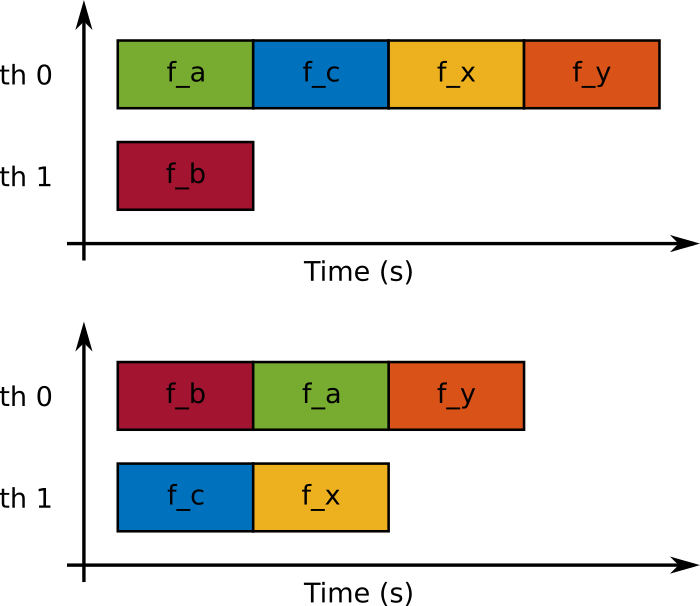

## Task priorities

The `priority` clause can be used to give the OpenMP scheduler a hint on
the importance of a task

``` sourceCode
int a, b, c, x, y;
double t=secs();
#pragma omp parallel
{
#pragma omp master
  {
#pragma omp task depend(out:b) priority(2)
    b = f_b();

#pragma omp task depend(out:c) priority(2)
    c = f_c();

#pragma omp task depend(out:a)
    a = f_a();

#pragma omp task depend(in:b,c) depend(out:x)
    x = f_x(b, c);

#pragma omp task depend(in:a,x) depend(out:y)
    y = f_y(a, x);

#pragma omp taskwait
    printf("y: %d (correct value is 9) and time is %f\n",y,secs()-t);
  }
}
```

## Task dependencies and pointers

When using pointers to specify dependencies, you should dereference it
to make sure the dependence is inferred from the pointed data rather
than the pointer variable.

``` sourceCode
int x[2]={0,0};
int *p=x;
double t=secs();
#pragma omp parallel
{
#pragma omp master
  {
#pragma omp task firstprivate(p) depend(out:*p)
    *p = compute_one(1.0);

    p+=1;

#pragma omp task firstprivate(p) depend(out:*p)
    *p = compute_one(1.0);

#pragma omp taskwait
    printf("x: {%d,%d} (correct value is {1,1}) and time is %f\n",x[0],x[1],secs()-t);
  }
}
```

# Locks

## Locks

A lock is a data of type `omp_lock_t` which can be used to prevent
simultaneous access to shared resources according to the schema

-   acquire (or set or lock) the lock

-   access data

-   release (on unset or unlock) the lock

Acquisition of the lock is exclusive in the sense that only one threads
can hold the lock at a given time. A lock can be in one of the following
states:

-   **uninitialized**: the lock is not active and cannot be
    acquired/released by any thread;

-   **unlocked**: the lock has been initialized and can be acquired by
    any thread;

-   **locked**: the lock has been acquired by one thread and cannot be
    acquired by any other thread until the owner releases it.

## Locks

Transitions through states can be achieved with the following routines

-   `omp_init_lock`: initializes a lock

-   `omp_destroy_lock`: uninitializes a lock

-   `omp_set_lock`: waits until a lock is available, and then sets it

-   `omp_unset_lock`: unsets a lock

-   `omp_test_lock`: tests a lock, and sets it if it is available

## Locks

Example

``` sourceCode
omp_lock_t lock;
omp_init_lock(&lock);

#pragma omp parallel
{
  omp_set_lock(&lock);
  printf("%d: It's my turn to use the resource\n",omp_get_thread_num());
  use_resource();
  omp_unset_lock(&lock);
}

omp_destroy_lock(&lock);
```

## Locks

Example with test lock

``` sourceCode
omp_lock_t lock;
omp_init_lock(&lock);

#pragma omp parallel
{

  while(!omp_test_lock(&lock)){
    /* if lock is already locked, I do some other useful stuff */
    printf("%d: lock is busy, I do some stuff\n",omp_get_thread_num());
    do_stuff(0.5);
  }

  printf("%d: It's my turn to use the resource\n",omp_get_thread_num());
  use_resource();
  omp_unset_lock(&lock);
}

omp_destroy_lock(&lock);
```

# Mistakes to avoid

## Add useless loops

Do not create a new loop just for the purpose of parallelizing it

``` sourceCode
#pragma omp parallel
{
  nth = omp_get_num_threads();
#pragma omp for
  for(i=0; i<nth; i++){
    do_stuff();
  }
}
```

This is exactly the same as

``` sourceCode
#pragma omp parallel
{
  do_stuff();
}
```

## Use tasks with caution

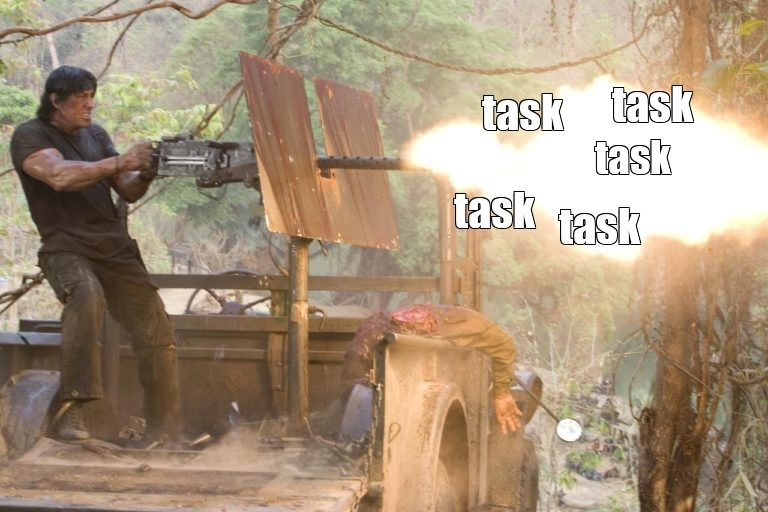

Tasks have a **relatively high overhead** and should be used with
caution.

-   creating a task for a few operations is probably a very bad idea
-   try to combine as many operations as possible into a single task as
    long as this does not reduce parallelism

## Minimize critical sections

Critical sections serialize the work of processes.

``` sourceCode
#pragma omp parallel for
  for(i=0; i<n; i++){
#pragma omp critical
    do_stuff();
  }
```

The code above is completely sequential. The execution time will be the
same as without the parallelization but the iterations will be done in a
different order.

-   separate what really needs to be in the critical section from what
    can be done in parallel
-   sometimes atomic instructions can be used instead of critical

## Don't forget the parallel section

Stupid to say but there is no parallelism if you don't put a parallel
section somewhere. Just don't forget.

Conversely, if you can merge multiple parallel sections into a single
one, it might be good to do so in order to reduce overhead

# Aux code

``` sourceCode
  int seed=-1;
  #pragma omp threadprivate(seed)

  int rnd_int() {
    // & 0x7fffffff is equivalent to modulo with RNG_MOD = 2^31
#if defined(_OPENMP)
    if(seed==-1) seed = omp_get_thread_num()+1;
#else
    if(seed==-1) seed = 1;
#endif
    return (seed = (seed * 1103515245 + 12345) & 0x7fffffff);
  }

  void rand_fill(int *x, int n){
    int i;
    for(i=0; i<n; i++){
      x[i]=rnd_int()%n-n/2;
    }
  }

  long usecs (){
    struct timeval t;

    gettimeofday(&t,NULL);
    return t.tv_sec*1000000+t.tv_usec;
  }

  double secs (){
    struct timeval t;

    gettimeofday(&t,NULL);
    return ((double)(t.tv_sec*1000000+t.tv_usec))/1000000.0;
  }

  void do_stuff(double sec){

    long s, e;
    s=0; e=0;
    s = usecs();
    while(((double) e-s)/1000000 < sec)
      {
        e = usecs();
      }
    return;
  }

  int compute_one(double sec){
    do_stuff(sec);
    return 1;
  }

  int f_a(){
    do_stuff(1.0);
    return 1;
  }

  int f_b(){
    do_stuff(1.0);
    return 2;
  }

  int f_c(){
    do_stuff(1.0);
    return 3;
  }

  int f_x(int b, int c){
    do_stuff(1.0);
    return b+c+1;
  }

  int f_y(int a, int x){
    do_stuff(1.0);
    return a+x+2;
  }

  void use_resource(){
    do_stuff(1.0);
    return;
  }
```

``` sourceCode
int rnd_int();
void rand_fill(int *x, int n);
long usecs ();
double secs ();
void do_stuff(double sec);
int compute_one(double sec);
int f_a();
int f_b();
int f_c();
int f_x(int b, int c);
int f_y(int a, int x);
void use_resource();
```